## Creating Pandas DataFrames

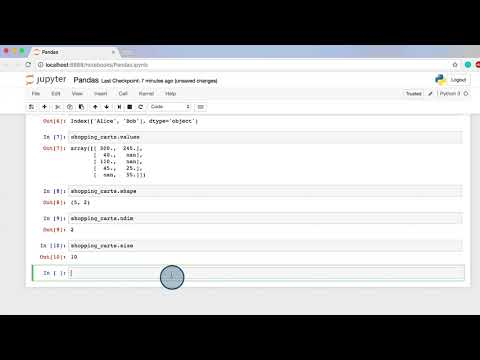

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo("eMHUn9v9dds",width="100%")

Pandas DataFrames are two-dimensional data structures with labeled rows and columns, that can hold many data types. If you are familiar with Excel, you can think of Pandas DataFrames as being similar to a spreadsheet. We can create Pandas DataFrames manually or by loading data from a file. In these lessons we will start by learning how to create Pandas DataFrames manually from dictionaries and later we will see how we can load data into a DataFrame from a data file.

We will start by creating a DataFrame manually from a dictionary of Pandas Series. In this case the first step is to create the dictionary of Pandas Series. After the dictionary is created we can then pass the dictionary to the pd.DataFrame() function.

We will create a dictionary that contains items purchased by two people, Alice and Bob, on an online store. The Pandas Series will use the price of the items purchased as data, and the purchased items will be used as the index labels to the Pandas Series. Let's see how this done in code:

In [4]:
# We import Pandas as pd into Python
import pandas as pd

# We create a dictionary of Pandas Series 
items = {'Bob' : pd.Series(data = [245, 25, 55], index = ['bike', 'pants', 'watch']),
         'Alice' : pd.Series(data = [40, 110, 500, 45], index = ['book', 'glasses', 'bike', 'pants'])}

# We print the type of items to see that it is a dictionary
print(type(items))

<class 'dict'>


Now that we have a dictionary, we are ready to create a DataFrame by passing it to the pd.DataFrame() function. We will create a DataFrame that could represent the shopping carts of various users, in this case we have only two users, Alice and Bob.



In [5]:
# We create a Pandas DataFrame by passing it a dictionary of Pandas Series
shopping_carts = pd.DataFrame(items)

# We display the DataFrame
shopping_carts

,Bob,Alice
bike,245.0,500.0
book,NaN,40.0
glasses,NaN,110.0
pants,25.0,45.0
watch,55.0,NaN


There are several things to notice here that are worth pointing out. We see that DataFrames are displayed in tabular form, much like an Excel spreadsheet, with the labels of rows and columns in bold. Also notice that the row labels of the DataFrame are built from the union of the index labels of the two Pandas Series we used to construct the dictionary. And the column labels of the DataFrame are taken from the keys of the dictionary. Another thing to notice is that the columns are arranged alphabetically and not in the order given in the dictionary. We will see later that this won't happen when we load data into a DataFrame from a data file. The last thing we want to point out is that we see some NaN values appear in the DataFrame. NaN stands for Not a Number, and is Pandas way of indicating that it doesn't have a value for that particular row and column index. For example, if we look at the column of Alice, we see that it has NaN in the watch index. You can see why this is the case by looking at the dictionary we created at the beginning. We clearly see that the dictionary has no item for Alice labeled watches. So whenever a DataFrame is created, if a particular column doesn't have values for a particular row index, Pandas will put a NaN value there. If we were to feed this data into a machine learning algorithm we will have to remove these NaN values first. In a later lesson we will learn how to deal with NaN values and clean our data. For now, we will leave these values in our DataFrame.

In the above example we created a Pandas DataFrame from a dictionary of Pandas Series that had clearly defined indexes. If we don't provide index labels to the Pandas Series, Pandas will use numerical row indexes when it creates the DataFrame. Let's see an example:

In [6]:
# We create a dictionary of Pandas Series without indexes
data = {'Bob' : pd.Series([245, 25, 55]),
        'Alice' : pd.Series([40, 110, 500, 45])}

# We create a DataFrame
df = pd.DataFrame(data)

# We display the DataFrame
df

,Bob,Alice
0,245.0,40
1,25.0,110
2,55.0,500
3,NaN,45


We can see that Pandas indexes the rows of the DataFrame starting from 0, just like NumPy indexes ndarrays.

Now, just like with Pandas Series we can also extract information from DataFrames using attributes. Let's print some information from our shopping_carts DataFrame

In [7]:
# We print some information about shopping_carts
print('shopping_carts has shape:', shopping_carts.shape)
print('shopping_carts has dimension:', shopping_carts.ndim)
print('shopping_carts has a total of:', shopping_carts.size, 'elements')
print()
print('The data in shopping_carts is:\n', shopping_carts.values)
print()
print('The row index in shopping_carts is:', shopping_carts.index)
print()
print('The column index in shopping_carts is:', shopping_carts.columns)

shopping_carts has shape: (5, 2)
shopping_carts has dimension: 2
shopping_carts has a total of: 10 elements

The data in shopping_carts is:
 [[ 245.  500.]
 [  nan   40.]
 [  nan  110.]
 [  25.   45.]
 [  55.   nan]]

The row index in shopping_carts is: Index(['bike', 'book', 'glasses', 'pants', 'watch'], dtype='object')

The column index in shopping_carts is: Index(['Bob', 'Alice'], dtype='object')


When creating the shopping_carts DataFrame we passed the entire dictionary to the pd.DataFrame() function. However, there might be cases when you are only interested in a subset of the data. Pandas allows us to select which data we want to put into our DataFrame by means of the keywords columns and index. Let's see some examples:

In [8]:
# We Create a DataFrame that only has Bob's data
bob_shopping_cart = pd.DataFrame(items, columns=['Bob'])

# We display bob_shopping_cart
bob_shopping_cart

,Bob
bike,245
pants,25
watch,55


In [9]:
# We Create a DataFrame that only has selected items for both Alice and Bob
sel_shopping_cart = pd.DataFrame(items, index = ['pants', 'book'])

# We display sel_shopping_cart
sel_shopping_cart

,Bob,Alice
pants,25.0,45
book,NaN,40


In [10]:
# We Create a DataFrame that only has selected items for Alice
alice_sel_shopping_cart = pd.DataFrame(items, index = ['glasses', 'bike'], columns = ['Alice'])

# We display alice_sel_shopping_cart
alice_sel_shopping_cart

,Alice
glasses,110
bike,500


You can also manually create DataFrames from a dictionary of lists (arrays). The procedure is the same as before, we start by creating the dictionary and then passing the dictionary to the pd.DataFrame() function. In this case, however, all the lists (arrays) in the dictionary must be of the same length. Let' see an example:

In [11]:
# We create a dictionary of lists (arrays)
data = {'Integers' : [1,2,3],
        'Floats' : [4.5, 8.2, 9.6]}

# We create a DataFrame 
df = pd.DataFrame(data)

# We display the DataFrame
df

,Integers,Floats
0,1,4.5
1,2,8.2
2,3,9.6


Notice that since the data dictionary we created doesn't have label indices, Pandas automatically uses numerical row indexes when it creates the DataFrame. We can however, put labels to the row index by using the index keyword in the pd.DataFrame() function. Let's see an example



In [12]:
# We create a dictionary of lists (arrays)
data = {'Integers' : [1,2,3],
        'Floats' : [4.5, 8.2, 9.6]}

# We create a DataFrame and provide the row index
df = pd.DataFrame(data, index = ['label 1', 'label 2', 'label 3'])

# We display the DataFrame
df

,Integers,Floats
label 1,1,4.5
label 2,2,8.2
label 3,3,9.6


The last method for manually creating Pandas DataFrames that we want to look at, is by using a list of Python dictionaries. The procedure is the same as before, we start by creating the dictionary and then passing the dictionary to the pd.DataFrame() function.

In [13]:
# We create a list of Python dictionaries
items2 = [{'bikes': 20, 'pants': 30, 'watches': 35}, 
          {'watches': 10, 'glasses': 50, 'bikes': 15, 'pants':5}]

# We create a DataFrame 
store_items = pd.DataFrame(items2)

# We display the DataFrame
store_items

,bikes,glasses,pants,watches
0,20,NaN,30,35
1,15,50.0,5,10


Again, notice that since the items2 dictionary we created doesn't have label indices, Pandas automatically uses numerical row indexes when it creates the DataFrame. As before, we can put labels to the row index by using the index keyword in the pd.DataFrame() function. Let's assume we are going to use this DataFrame to hold the number of items a particular store has in stock. So, we will label the row indices as store 1 and store 2.

In [14]:
# We create a list of Python dictionaries
items2 = [{'bikes': 20, 'pants': 30, 'watches': 35}, 
          {'watches': 10, 'glasses': 50, 'bikes': 15, 'pants':5}]

# We create a DataFrame  and provide the row index
store_items = pd.DataFrame(items2, index = ['store 1', 'store 2'])

# We display the DataFrame
store_items

,bikes,glasses,pants,watches
store 1,20,NaN,30,35
store 2,15,50.0,5,10
